# Downloading and Prepping Data <a id="2"></a>


Import Primary Modules:


In [1]:
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup
import json  
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

#!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org install folium==0.12.1
#!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org install branca
#uncomment if you need to install folium
#import folium #maps library

from sklearn.cluster import KMeans


In [2]:
#!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org install  folium ==0.5.0

In [3]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org install pyshp

In [4]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

In [6]:
%matplotlib inline

In [7]:
sf = shp.Reader(r"C:\Users\popov.v\Downloads\moscow_adm.dbf")

In [8]:
len(sf.shapes())

146

In [9]:
sf.records()[1]


Record #1: ['45268595', '45328000', 'Filevskij Park', 'Western']

In [10]:
for i in range(len(sf.shapes())):
    print(sf.records()[i])

Record #0: ['45298555', '45945000', 'Poselenie Kievskij', 'Troitsky']
Record #1: ['45268595', '45328000', 'Filevskij Park', 'Western']
Record #2: ['45298567', '45954000', 'Poselenie Novofedorovskoe', 'Troitsky']
Record #3: ['45298575', '45956000', 'Poselenie Rogovskoe', 'Troitsky']
Record #4: ['45297568', '45953000', 'Poselenie Mosrentgen', 'Novomoskovsky']
Record #5: ['45298553', '45943000', 'Poselenie Voronovskoe', 'Troitsky']
Record #6: ['45298564', '45951000', 'Poselenie Mihajlovo-Jarcevskoe', 'Troitsky']
Record #7: ['45297562', '45949000', 'Poselenie Marushkinskoe', 'Novomoskovsky']
Record #8: ['45298572', '45955000', 'Poselenie Pervomajskoe', 'Troitsky']
Record #9: ['45272562', '45331000', 'Matushkino', 'Zelenogradsky']
Record #10: ['45268552', '45317000', 'Vnukovo', 'Western']
Record #11: ['45272568', '45377000', 'Savelki', 'Zelenogradsky']
Record #12: ['45297552', '45941000', 'Poselenie Vnukovskoe', 'Novomoskovsky']
Record #13: ['45272572', '45332000', 'Silino', 'Zelenogradsky'

In [11]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [12]:
df = read_shapefile(sf)
df.sample(5)

,OKATO,OKTMO,RAION,OKRUGS,coords
24,45293586,45907000,Teplyj Stan,South-Western,"[(37.4557187, 55.6370488), (37.4637211, 55.640..."
117,45290564,45388000,Lefortovo,South-Eastern,"[(37.6705308, 55.7507488), (37.6710752, 55.751..."
77,45293562,45901000,Zjuzino,South-Western,"[(37.5639978, 55.6494629), (37.5644649, 55.650..."
59,45268554,45318000,Dorogomilovo,Western,"[(37.4892942, 55.7330146), (37.4896704, 55.733..."
26,45297565,45952000,Poselenie Moskovskij,Novomoskovsky,"[(37.306069, 55.6189466), (37.3124912, 55.6222..."


In [13]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

(37.64272467307693, 55.66598080512821)

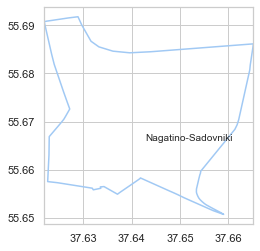

In [14]:
district = 'Nagatino-Sadovniki'
com_id = df[df.RAION == district].index[0]
plot_shape(com_id, district)

In [15]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

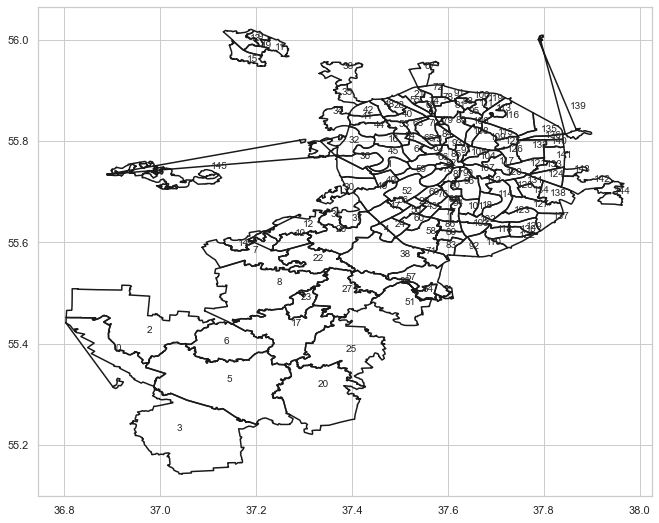

In [16]:
plot_map(sf)

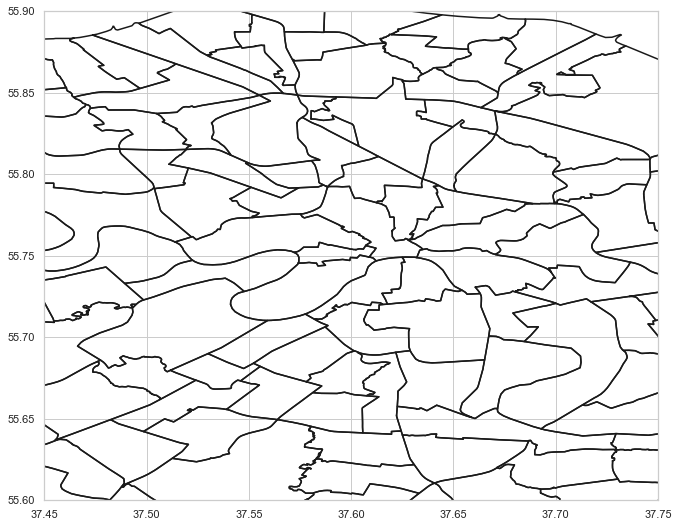

In [17]:
y_lim = (55.6,55.9) # latitude 
x_lim = (37.45, 37.75) # longitude
plot_map(sf, x_lim, y_lim)

In [18]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

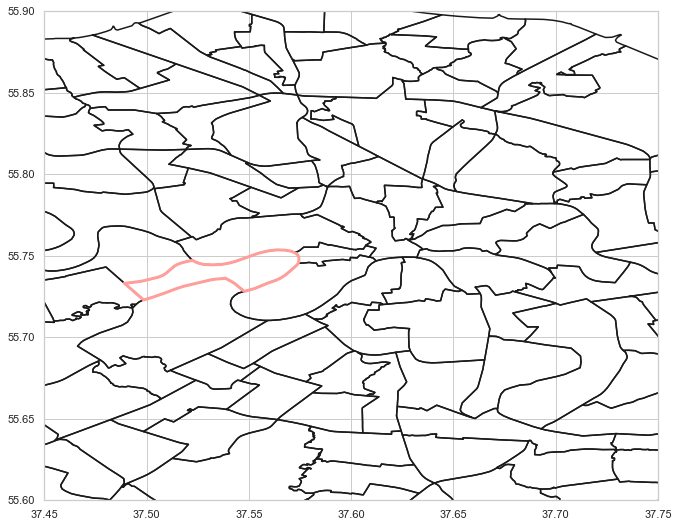

In [19]:
plot_map2(59, sf, x_lim, y_lim)

In [20]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

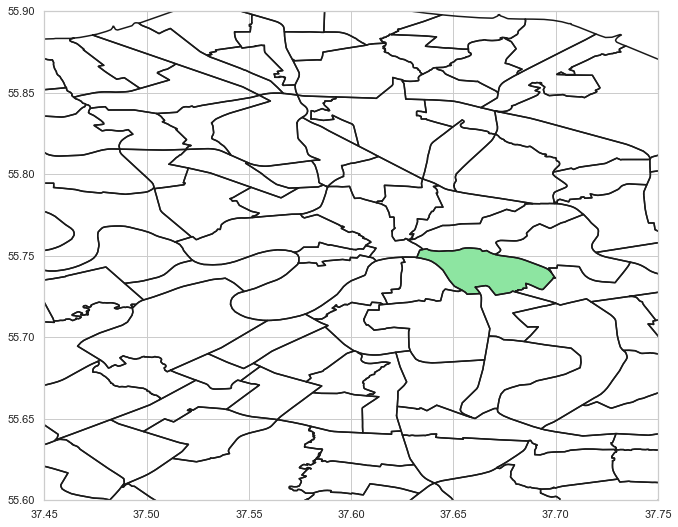

In [21]:
plot_map_fill(107, sf, x_lim, y_lim, color='g')

In [22]:
def plot_map_fill_multiples_ids(title, district, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in district:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

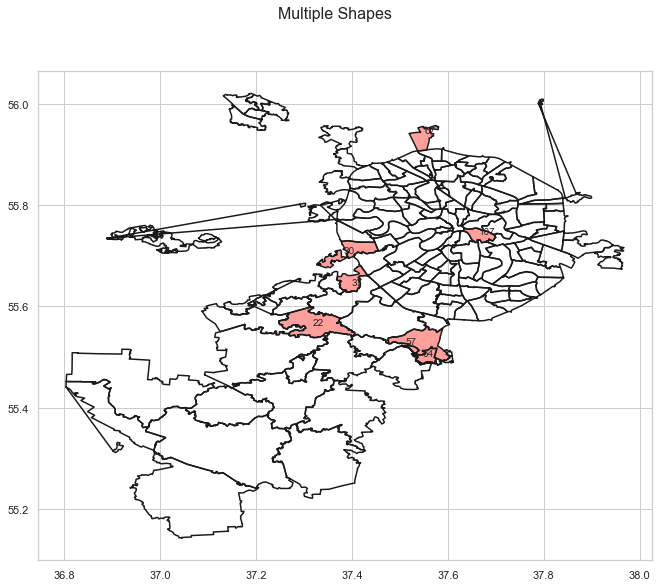

In [23]:
district_id = [30, 107, 22, 37, 64, 57, 67]
plot_map_fill_multiples_ids("Multiple Shapes", district_id, sf, color = 'r')

In [24]:
df.head()

,OKATO,OKTMO,RAION,OKRUGS,coords
0,45298555,45945000,Poselenie Kievskij,Troitsky,"[(36.8031012, 55.4408329), (36.8031903, 55.441..."
1,45268595,45328000,Filevskij Park,Western,"[(37.4276499, 55.7482092), (37.4284863, 55.748..."
2,45298567,45954000,Poselenie Novofedorovskoe,Troitsky,"[(36.8035692, 55.4516224), (36.8045117, 55.465..."
3,45298575,45956000,Poselenie Rogovskoe,Troitsky,"[(36.9372397, 55.2413907), (36.9372604, 55.241..."
4,45297568,45953000,Poselenie Mosrentgen,Novomoskovsky,"[(37.4395575, 55.6273129), (37.4401803, 55.630..."


In [25]:
def plot_districts_2(sf, title, districts, color):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    df = read_shapefile(sf)
    ids = []
    for i in districts:
        ids.append(df[df.RAION == i].index[0])
    plot_map_fill_multiples_ids(title, ids, sf, 
                                       x_lim = None, 
                                       y_lim = None, 
                                       figsize = (11,9), 
                                       color = color);

<Figure size 792x648 with 0 Axes>

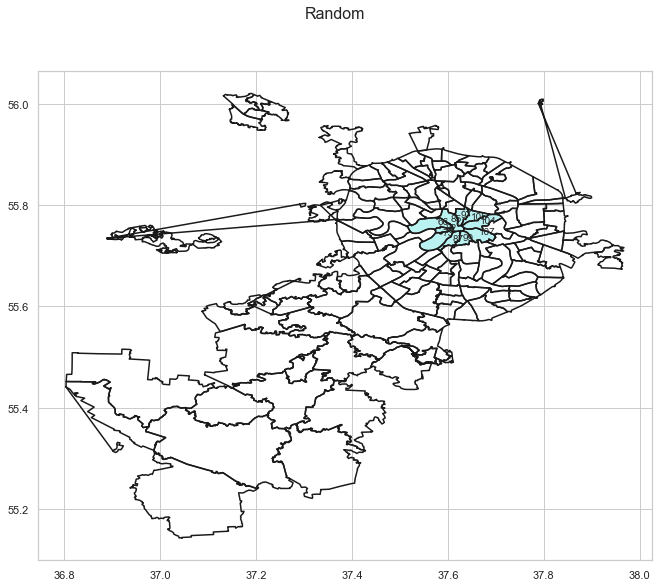

In [26]:
random_dists = list(df[df.OKRUGS == 'Central'].RAION)
plot_districts_2(sf, 'Random', random_dists, 'c')

In [27]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; colors = 'Greys';
        elif color == 9: color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            
            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [28]:
df.head()

,OKATO,OKTMO,RAION,OKRUGS,coords
0,45298555,45945000,Poselenie Kievskij,Troitsky,"[(36.8031012, 55.4408329), (36.8031903, 55.441..."
1,45268595,45328000,Filevskij Park,Western,"[(37.4276499, 55.7482092), (37.4284863, 55.748..."
2,45298567,45954000,Poselenie Novofedorovskoe,Troitsky,"[(36.8035692, 55.4516224), (36.8045117, 55.465..."
3,45298575,45956000,Poselenie Rogovskoe,Troitsky,"[(36.9372397, 55.2413907), (36.9372604, 55.241..."
4,45297568,45953000,Poselenie Mosrentgen,Novomoskovsky,"[(37.4395575, 55.6273129), (37.4401803, 55.630..."


In [29]:
def plot_districts_data(sf, title, districts, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected districts, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    ids = []
    for i in districts:
        #i = conv_comuna(i).upper()
        ids.append(df[df.RAION == i].index[0])
    plot_map_fill_multiples_ids_tone(sf, title, ids, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [30]:
def plot_map_fill_multiples_ids_tone(sf, title, district,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in district:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[district.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)


1: 100 => 265 
2: 266 => 365 
3: 366 => 499 
4: 500 => 599 
5: 600 => 1999 
6: 2000 => 399999 

   1   2   3   4   5   6


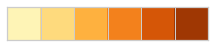

<Figure size 792x648 with 0 Axes>

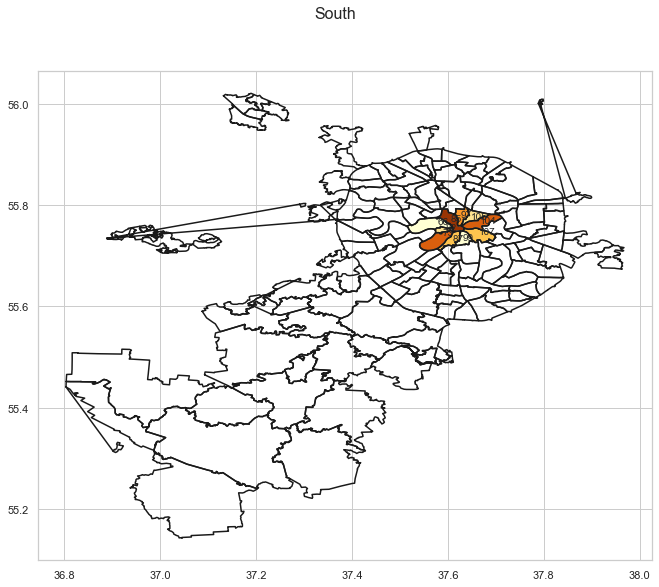

In [31]:
center = list(df[df.OKRUGS == 'Central'].RAION)
data = [100, 2000, 300, 400000, 500, 600, 100, 2000, 300, 400, 500, 600, 100, 2000, 300, 400, 500, 600]
print_id = True # The shape id will be printed
color_pallete = 4 # 'Purples'
plot_districts_data(sf, 'South', center, data, color_pallete, print_id)

In [32]:
for i in range(len(sf.records())):
    print(sf.records()[i][2])

Poselenie Kievskij
Filevskij Park
Poselenie Novofedorovskoe
Poselenie Rogovskoe
Poselenie Mosrentgen
Poselenie Voronovskoe
Poselenie Mihajlovo-Jarcevskoe
Poselenie Marushkinskoe
Poselenie Pervomajskoe
Matushkino
Vnukovo
Savelki
Poselenie Vnukovskoe
Silino
Poselenie Kokoshkino
Krjukovo
Shhukino
Poselenie Krasnopahorskoe
Nagatinskij Zaton
Staroe Krjukovo
Poselenie Klenovskoe
Dmitrovskoe
Poselenie Filimonkovskoe
Troickij okrug
Teplyj Stan
Poselenie Shhapovskoe
Poselenie Moskovskij
Poselenie Desjonovskoe
Hovrino
Lomonosovskoe
Mozhajskoe
Novo-Peredelkino
Strogino
Molzhaninovskoe
Mitino
Kurkino
Krylatskoe
Solncevo
Poselenie Sosenskoe
Poselenie Voskresenskoe
Golovinskoe
Juzhnoe Tushino
Severnoe Tushino
Cheremushki
Pokrovskoe Streshnevo
Horoshevo-Mnevniki
Ochakovo-Matveevskoe
Troparevo-Nikulino
Levoberezhnoe
Fili Davydkovo
Obruchevskoe
Poselenie Rjazanovskoe
Ramenki
Vojkovskoe
Sokol
Zapadnoe Degunino
Prospekt Vernadskogo
Juzhnoe Butovo
Jasenevo
Dorogomilovo
Kon'kovo
Horoshevskoe
Begovoe
Koptev

In [33]:
df.set_index(['OKRUGS', 'RAION']).sort_index().to_excel('ОКРУГА-РАЙОНЫ МОСКВЫ (2).xlsx')


In [34]:
!pip install lxml
!pip install requests
!pip install beautifulsoup4

In [35]:
MSK_Crime = pd.read_csv('https://raw.githubusercontent.com/infoculture/moscowpolicedata/master/districts.csv')

In [36]:
MSK_Crime.loc[14]

upperdistrict                                                   САО
name                                             Восточное Дегунино
population2015                                               98 206
population2014                                               97 915
population2013                                               97 438
                                        ...                        
street2014                                                    373.0
street2013                                                    469.0
street2012                                                    690.0
street2011                                                      NaN
sources           https://github.com/openpolicerussia/moscowpoli...
Name: 14, Length: 88, dtype: object

<H2>Data Preparation and Cleansing<H2>

While data come in two handy datasets (one even providing shapefile), some modifications ought to be made to merge, analyze them and plot maps.

In [37]:
for i in ['population2015', 'population2014', 'population2013', 'population2012', 'population2011', 'crimes2011']:
    MSK_Crime[i] = (MSK_Crime[i].str.replace(' ', '')).apply(pd.to_numeric)

In [38]:
MSK_Crime.fillna(0, inplace=True)

In order to picture crime data on Moscow map and check what districts might be considered the most problematic, we will have to match districts names written in Russian in crime dataset with the corresponding tranliterated names in the shapefile using transliterate library.



In [39]:
!pip install transliterate

In [40]:
from transliterate import translit, get_available_language_codes
MSK_Crime['name ENG'] = MSK_Crime['name'].apply(lambda x: (translit(x, 'ru', reversed=True)))

Even though both datasets contain transliterated names, they cannot be merged for numerous reasons:
1. Transliteration may work differently even for originally identical words.
2. Russian conjugation varies pre-processed words and tranlisteration heavily, rendering transliterated word inapplicable to indexing and merging
3. Sets slightly vary in data itself

To deal with the transliteration issues Levenshtein distance will be used.


In [41]:
!pip install fuzzywuzzy
!pip install python-Levenshtein
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

Due to the fact that Moscow administative structure (and so is dictrict numbers) has changed in 2012, it is necessary to insure that both dataframes contain the same number of rows (information on districts) and can be concaterated.

Troitsky and Zelenogradsky areas have to be dropped in order to achieve data's uniformity. They will appear on maps, however, since shapefile will not be modified, but will be rendered inactive.

Zero population at 'ТГК Измайлово', 'РУДН' and 'МГУ' indicate potential outliers, and for a good reason - those rowss are not districts, but rather a territories (hotel and two universities).

In order not to discard this information, we will sum realted data to the actual districts those crimes belong to. The rows itself will have to be deleted.

Exception will be made for 'РУДН', since it is located on the boundries of 2 distrcits, and alocating crimes commited on the territory cannot be performed accurately. 

In [42]:
df.loc[139, 'RAION'] = 'Vostochnij'

df[df.RAION == 'Vostochnoe']
MSK_Crime[MSK_Crime.name == 'Восточный']
MSK_Crime.loc[46, 'name ENG'] = 'Vostochnoe'

MSK_Crime[MSK_Crime.name == 'Восточное Дегунино']
MSK_Crime.loc[14, 'name ENG'] = 'Vostochnoe Degunino'


MSK_Crime.loc[111] = MSK_Crime.loc[[111,116]].sum(axis=0, numeric_only=True)
MSK_Crime.loc[111, 'upperdistrict'] = 'ЗАО'
MSK_Crime.loc[111, 'name'] = 'Раменки'
MSK_Crime.loc[111, 'name ENG'] = 'Ramenki'

MSK_Crime.loc[49] = MSK_Crime.loc[[49,59]].sum(axis=0, numeric_only=True)
MSK_Crime.loc[49, 'upperdistrict'] = 'ВАО'
MSK_Crime.loc[49, 'name'] = 'Измайлово'
MSK_Crime.loc[49, 'name ENG'] = 'Izmajlovo'

MSK_Crime = MSK_Crime[MSK_Crime.name !='РУДН']
MSK_Crime = MSK_Crime[MSK_Crime.name !='МГУ']
MSK_Crime = MSK_Crime[MSK_Crime.name !='ТГК Измайлово']
MSK_Crime = MSK_Crime[MSK_Crime.name !='Марьинский парк']


MSK_Crime.loc[60] = MSK_Crime.loc[[60,3]].sum(axis=0, numeric_only=True)
MSK_Crime.loc[60, 'upperdistrict'] = 'ЮВАО'
MSK_Crime.loc[60, 'name'] = 'Выхино-Жулебино'
MSK_Crime.loc[60, 'name ENG'] = 'Vyhino-Zhulebino'
MSK_Crime = MSK_Crime[MSK_Crime.name !='Жулебино']
#MSK_Crime[MSK_Crime.name =='Жулебино']


df = df[(df.OKRUGS !='Troitsky') & (df.OKRUGS !='Novomoskovsky')]
df = df[df.OKRUGS != 'Zelenogradsky']

MSK_Crime = MSK_Crime[(MSK_Crime.upperdistrict != 'ТИНАО')]
MSK_Crime = MSK_Crime[(MSK_Crime.upperdistrict != 'ЗелАО')]




While being an extremely useful method, Levenshtein distance has to be callibrated and supervised.

To assist it and prevent from returning too many false positives, we need to transliterate Okrugs name (that is, upperdistricts or areas) and match them, so Levenshtein distance doe not have to match districts from the whole city (120 districts), but rather between 5 to 16.

In [43]:
df.OKRUGS.value_counts().index
MSK_Crime.upperdistrict.value_counts().index

keys_list = ['North-Eastern', 'Northern', 'Southern', 'Eastern', 'Western', 'South-Eastern', 'South-Western', 'Central', 'North-Western']
values_list = ['СВАО', 'САО', 'ЮАО', 'ВАО', 'ЗАО', 'ЮВАО', 'ЮЗАО', 'ЦАО', 'СЗАО']
zip_iterator = zip(keys_list, values_list) 
a_dictionary = dict(zip_iterator)
a_dictionary 
df['OKRUGS_RUS'] = df.OKRUGS.apply(lambda x: a_dictionary[x])


In [44]:
df.sort_values('OKRUGS_RUS', inplace=True)
MSK_Crime.sort_values('upperdistrict', inplace=True)

In [45]:
MSK_Crime['name ENG'] = MSK_Crime['name ENG'].apply(lambda x: x.replace('oe', 'ij'))
MSK_Crime['name ENG'] = MSK_Crime['name ENG'].apply(lambda x: x.replace('oe', 'yj'))

In [46]:
alternative = []
for i in range(len(df.OKRUGS_RUS.sort_values().unique())):
    print(df.OKRUGS_RUS.sort_values().sort_values().unique()[i])
    for z in range(len(MSK_Crime[MSK_Crime.upperdistrict == df.OKRUGS_RUS.sort_values().unique()[i]])):
        #print('df', df[df.OKRUGS_RUS == df.OKRUGS_RUS.unique()[i]].RAION.unique()[z])
        dist_name_df = (df[df.OKRUGS_RUS == df.OKRUGS_RUS.sort_values().unique()[i]].RAION.sort_values().unique()[z])
        #print((MSK_Crime[MSK_Crime.upperdistrict == df.OKRUGS_RUS.unique()[i]])['name ENG'].unique()[z])
        for s in range(len(MSK_Crime[MSK_Crime.upperdistrict == df.OKRUGS_RUS.sort_values().unique()[i]])):
            #print('MSK',(MSK_Crime[MSK_Crime.upperdistrict == df.OKRUGS_RUS.unique()[i]])['name ENG'].unique()[s])
            dist_name_crime = ((MSK_Crime[MSK_Crime.upperdistrict == df.OKRUGS_RUS.sort_values().unique()[i]])['name ENG'].sort_values().unique()[s])
            #print(dist_name_df, dist_name_crime)
            Levenshtein = (fuzz.token_sort_ratio(dist_name_df.replace(' ', '_'), dist_name_crime.replace(' ', '')))
            Levenshtein_partial = (fuzz.partial_ratio(dist_name_df.replace(' ', '_'), dist_name_crime.replace(' ', '')))
            if  Levenshtein >= 75:
                print(dist_name_df, dist_name_crime, i, z, 'Levenshtein:', Levenshtein)
                alternative.append({'df_name': dist_name_df,'crime_df_name': dist_name_crime})
        
        

ВАО
Bogorodskoe Bogorodskij 0 0 Levenshtein: 82
Gol'janovo Gol'janovo 0 1 Levenshtein: 100
Ivanovskoe Ivanovskij 0 2 Levenshtein: 80
Izmajlovo Izmajlovo 0 3 Levenshtein: 100
Kosino-Uhtomskoe Kosino-Uhtomskij 0 4 Levenshtein: 88
Metrogorodok Metrogorodok 0 5 Levenshtein: 100
Novogireevo Novogireevo 0 6 Levenshtein: 100
Novokosino Novokosino 0 7 Levenshtein: 100
Perovo Perovo 0 8 Levenshtein: 100
Preobrazhenskoe Preobrazhenskij 0 9 Levenshtein: 87
Severnoe Izmajlovo Severnij Izmajlovo 0 10 Levenshtein: 86
Sokol'niki Sokol'niki 0 11 Levenshtein: 100
Sokolinaja Gora Sokolinaja gora 0 12 Levenshtein: 97
Veshnjaki Veshnjaki 0 13 Levenshtein: 100
Vostochnij Vostochnij 0 14 Levenshtein: 100
Vostochnoe Izmajlovo Vostochnij Izmajlovo 0 15 Levenshtein: 87
ЗАО
Dorogomilovo Dorogomilovo 1 0 Levenshtein: 100
Filevskij Park Filevskij Park 1 1 Levenshtein: 96
Krylatskoe Krylatskij 1 3 Levenshtein: 80
Kuncevo Kuntsevo 1 4 Levenshtein: 80
Mozhajskoe Mozhajskij 1 5 Levenshtein: 80
Novo-Peredelkino Novo-P

Even with manual modifications Levenshtein distance worked considerably well, allowing to automate about 80% of matches. Let's make final modifications to complete merging preparations.

In [48]:
alternative.append({'df_name': 'Fili Davydkovo','crime_df_name': 'Fili-Davydkovo'})
alternative.append({'df_name': 'Caricyno','crime_df_name': 'Tsaritsyno'})
alternative.append({'df_name': 'Meshhanskoe','crime_df_name': 'Meschanskij'})

In [49]:
df[~df.RAION.isin(pd.DataFrame(alternative).df_name)]
MSK_Crime[~MSK_Crime['name ENG'].isin(pd.DataFrame(alternative).crime_df_name)]

,upperdistrict,name,population2015,population2014,population2013,population2012,population2011,crimebook2015,crimebook2014,crimebook2013,...,publicplaces2013,publicplaces2012,publicplaces2011,street2015,street2014,street2013,street2012,street2011,sources,name ENG


It is easy to check that a list of matches has been obtained. Now two dataframes can be merged.

In [50]:
connector = pd.DataFrame(alternative).sort_values('df_name')
connector.columns = ['RAION', 'name ENG']
df = df.merge(connector, on='RAION')
df = df.merge(MSK_Crime, on='name ENG')

In [51]:
df.columns

Index(['OKATO', 'OKTMO', 'RAION', 'OKRUGS', 'coords', 'OKRUGS_RUS', 'name ENG',
       'upperdistrict', 'name', 'population2015', 'population2014',
       'population2013', 'population2012', 'population2011', 'crimebook2015',
       'crimebook2014', 'crimebook2013', 'crimebook2012', 'crimebook2011',
       'crimes2015', 'crimes2014', 'crimes2013', 'crimes2012', 'crimes2011',
       'economiccrimes2015', 'economiccrimes2014', 'economiccrimes2013',
       'economiccrimes2012', 'economiccrimes2011', 'gravecrimes2015',
       'gravecrimes2014', 'gravecrimes2013', 'gravecrimes2012',
       'gravecrimes2011', 'murders2015', 'murders2014', 'murders2013',
       'murders2012', 'murders2011', 'healthdamage2015', 'healthdamage2014',
       'healthdamage2013', 'healthdamage2012', 'healthdamage2011',
       'robbing2015', 'robbing2014', 'robbing2013', 'robbing2012',
       'robbing2011', 'banditry2015', 'banditry2014', 'banditry2013',
       'banditry2012', 'banditry2011', 'thefts2015', 'thefts201

<h2>Data exploration<h2>

Time to check what distircts has highest inhabitants to crime ratio.


1: 0 => 111 
2: 112 => 125 
3: 126 => 139 
4: 140 => 164 
5: 165 => 217 
6: 218 => 403 

   1   2   3   4   5   6

1: 0 => 943 
2: 944 => 1169 
3: 1170 => 1459 
4: 1460 => 1734 
5: 1735 => 1957 
6: 1958 => 4512 

   1   2   3   4   5   6


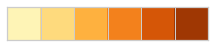

<Figure size 792x648 with 0 Axes>

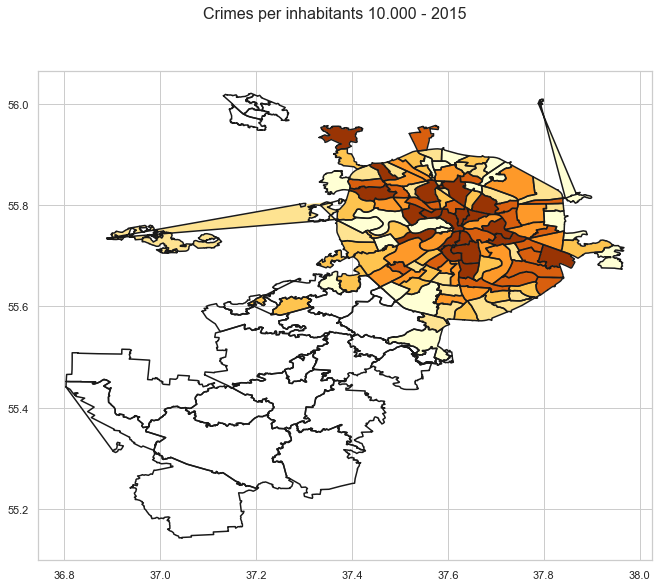

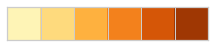

<Figure size 792x648 with 0 Axes>

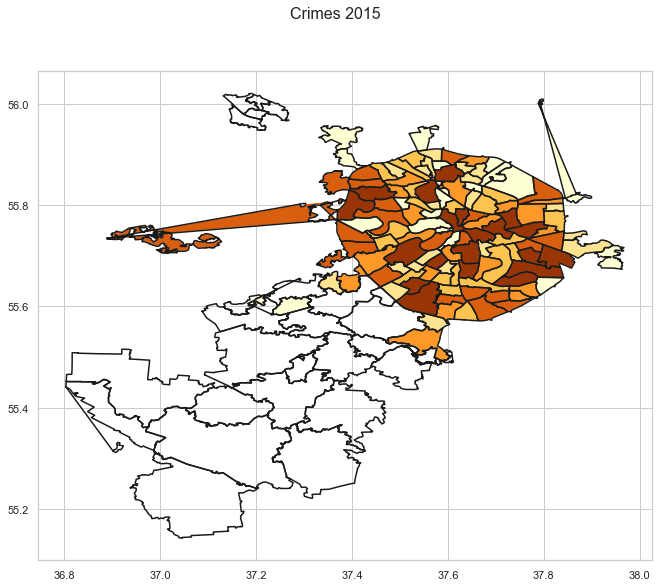

In [68]:
df.loc[10, 'RAION'] = 'Vostochnoe' #quick fix
def plot_districts_data(sf, title, districts, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected districts, using specific color
    '''

    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    ids = []
    for i in range(len(districts)):
        if df.RAION.loc[10:10].isin(read_shapefile(sf).RAION).values[0]:
            
            #i = conv_comuna(i).upper()
            ids.append(df[df.RAION == districts[i]].index[0])
            #print(ids)
        else:
            pass

        
    plot_map_fill_multiples_ids_tone(sf, title, ids, 
                                         print_id, 
                                         color_ton, 
                                         bins, 
                                         x_lim = None, 
                                         y_lim = None, 
                                         figsize = (11,9));
    

distrits = list(df.RAION)
data = list(df.crimes2015/(df.population2015/10000))
data_1 = list(df.crimes2015)
print_id = False # The shape id will be printed
color_pallete = 4 # 'Purples'
plot_districts_data(sf, 'Crimes per inhabitants 10.000 - 2015', distrits, data, color_pallete, print_id)
plot_districts_data(sf, 'Crimes 2015', distrits, data_1, color_pallete, print_id)

,OKATO,OKTMO,RAION,OKRUGS,coords,OKRUGS_RUS,name ENG,upperdistrict,name,population2015,population2014,population2013,population2012,population2011,crimebook2015,crimebook2014,crimebook2013,crimebook2012,crimebook2011,crimes2015,crimes2014,crimes2013,crimes2012,crimes2011,economiccrimes2015,economiccrimes2014,economiccrimes2013,economiccrimes2012,economiccrimes2011,gravecrimes2015,gravecrimes2014,gravecrimes2013,gravecrimes2012,gravecrimes2011,murders2015,murders2014,murders2013,murders2012,murders2011,healthdamage2015,healthdamage2014,healthdamage2013,healthdamage2012,healthdamage2011,robbing2015,robbing2014,robbing2013,robbing2012,robbing2011,banditry2015,banditry2014,banditry2013,banditry2012,banditry2011,thefts2015,thefts2014,thefts2013,thefts2012,thefts2011,burglary2015,burglary2014,burglary2013,burglary2012,burglary2011,carthefts2015,carthefts2014,carthefts2013,carthefts2012,carthefts2011,fraud2015,fraud2014,fraud2013,fraud2012,fraud2011,hijacking2015,hijacking2014,hijacking2013,hijacking2012,hijacking2011,drugs2015,drugs2014,drugs2013,drugs2012,drugs2011,publicplaces2015,publicplaces2014,publicplaces2013,publicplaces2012,publicplaces2011,street2015,street2014,street2013,street2012,street2011,sources
0,45263588,45314000,Sokolinaja Gora,Eastern,"[(37.6993199, 55.7827141), (37.7007925, 55.782...",ВАО,Sokolinaja gora,ВАО,Соколиная гора,89849.0,89568.0,88943.0,88064.0,87132.0,0.0,0.0,29259.0,27265.0,23314.0,1967.0,1949.0,1540.0,1508.0,1732.0,0.0,0.0,0.0,0.0,0.0,505.0,525.0,461.0,366.0,429.0,0.0,2.0,1.0,2.0,4.0,16.0,4.0,10.0,15.0,0.0,85.0,82.0,107.0,105.0,115.0,21.0,35.0,26.0,17.0,24.0,1153.0,1089.0,933.0,1025.0,1085.0,54.0,67.0,55.0,81.0,111.0,55.0,71.0,78.0,122.0,0.0,0.0,222.0,134.0,142.0,194.0,0.0,0.0,0.0,6.0,20.0,272.0,234.0,161.0,81.0,0.0,1353.0,1464.0,989.0,1161.0,0.0,775.0,990.0,754.0,743.0,0.0,https://github.com/openpolicerussia/moscowpoli...
1,45263552,45301000,Bogorodskoe,Eastern,"[(37.6702104, 55.8387396), (37.6712583, 55.838...",ВАО,Bogorodskij,ВАО,Богородское,107629.0,106828.0,106076.0,105412.0,104911.0,0.0,22694.0,21307.0,17381.0,0.0,1357.0,1261.0,1116.0,968.0,1289.0,0.0,0.0,12.0,4.0,0.0,0.0,307.0,316.0,331.0,413.0,2.0,8.0,5.0,4.0,6.0,8.0,15.0,6.0,8.0,0.0,76.0,74.0,99.0,84.0,126.0,21.0,16.0,22.0,28.0,43.0,679.0,651.0,524.0,576.0,814.0,42.0,48.0,63.0,94.0,167.0,39.0,44.0,50.0,62.0,80.0,0.0,97.0,87.0,41.0,57.0,10.0,6.0,23.0,14.0,36.0,149.0,154.0,142.0,104.0,42.0,849.0,793.0,585.0,549.0,604.0,573.0,590.0,505.0,487.0,530.0,https://github.com/openpolicerussia/moscowpoli...
2,45263581,45311000,Metrogorodok,Eastern,"[(37.6702104, 55.8387396), (37.6707205, 55.838...",ВАО,Metrogorodok,ВАО,Метрогородок,37785.0,37042.0,36993.0,36904.0,36526.0,11601.0,11766.0,8398.0,7613.0,0.0,620.0,458.0,468.0,383.0,288.0,0.0,0.0,0.0,42.0,0.0,143.0,142.0,180.0,125.0,0.0,2.0,1.0,0.0,2.0,0.0,3.0,4.0,3.0,6.0,0.0,26.0,25.0,20.0,23.0,0.0,12.0,5.0,14.0,16.0,0.0,281.0,218.0,184.0,196.0,0.0,8.0,13.0,9.0,33.0,0.0,16.0,11.0,10.0,14.0,0.0,33.0,30.0,2.0,2.0,0.0,0.0,0.0,6.0,7.0,0.0,87.0,80.0,112.0,52.0,0.0,384.0,306.0,192.0,225.0,0.0,297.0,240.0,157.0,187.0,0.0,https://github.com/openpolicerussia/moscowpoli...
3,45263583,45312000,Perovo,Eastern,"[(37.7196119, 55.7519793), (37.7217503, 55.752...",ВАО,Perovo,ВАО,Перово,140923.0,140762.0,140669.0,140098.0,139942.0,35184.0,35191.0,32076.0,30502.0,0.0,1985.0,1905.0,1848.0,2029.0,1755.0,0.0,0.0,0.0,100.0,0.0,463.0,515.0,431.0,491.0,0.0,0.0,0.0,5.0,11.0,9.0,16.0,14.0,7.0,13.0,0.0,97.0,114.0,136.0,155.0,0.0,18.0,16.0,14.0,26.0,22.0,0.0,1070.0,1030.0,1160.0,1055.0,54.0,70.0,73.0,94.0,74.0,71.0,98.0,100.0,129.0,0.0,0.0,0.0,229.0,230.0,153.0,0.0,0.0,23.0,26.0,0.0,0.0,81.0,177.0,121.0,95.0,1310.0,1105.0,520.0,894.0,916.0,727.0,856.0,501.0,516.0,448.0,https://github.com/openpolicerussia/moscowpoli...
4,45263555,45302000,Veshnjaki,Eastern,"[(37.7672991, 55.7342686), (37.7696976, 55.734...",ВАО,Veshnjaki,ВАО,Вешняки,122124.0,121693.0,121605.0,121007.0,120949.0,0.0,28662.0,33804.0,0.0,0.0,1746.0,1827.0,1688.0,1855.0,16

Apparently, number of crime varies in absolute and relative terms, with some districts conributing heavily to Moscow crime, yet being relatively calm when it comes to comparing total crimes number to districts population.

On the opposite, some districts looks to be dengerous both in relative and absolute terms.

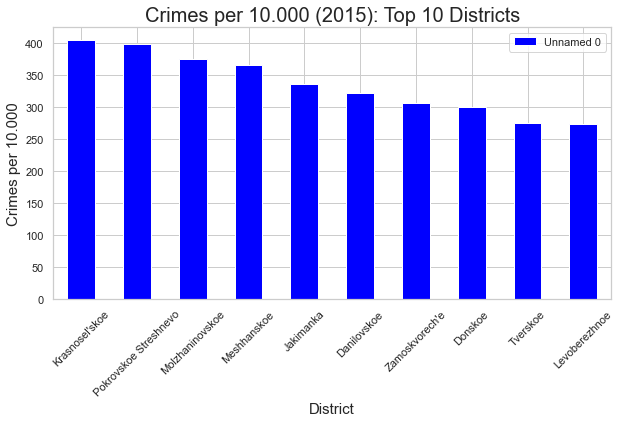

In [238]:
#df.groupby('RAION')['crimes2015', 'crimes2014', 'crimes2013', 'crimes2012', 'crimes2011'].describe().T
generic = pd.DataFrame([df.RAION, df.crimes2015/(df.population2015/10000)]).T
clr = "blue"
generic.groupby('RAION').sum(['Unnamed 0']).sort_values('Unnamed 0', ascending=False)[:10].plot.bar(figsize=(10,5), color=clr)
plt.title('Crimes per 10.000 (2015): Top 10 Districts', fontsize = 20)
plt.xlabel('District', fontsize = 15)
plt.ylabel('Crimes per 10.000',fontsize = 15)
plt.xticks(rotation = 45)
plt.legend()
plt.show()

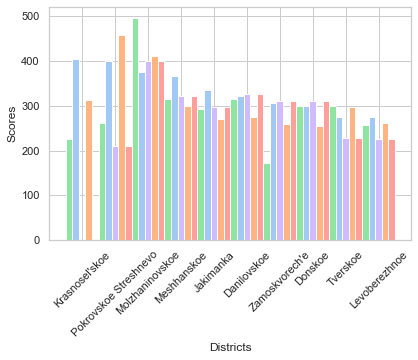

In [329]:


Pre_10_k_2015 = df.crimes2015/(df.population2015/10000)
Pre_10_k_2014 = df.crimes2014/(df.population2014/10000)
Pre_10_k_2013 = df.crimes2013/(df.population2013/10000)
Pre_10_k_2012 = df.crimes2012/(df.population2012/10000)
Pre_10_k_2011 = df.crimes2011/(df.population2011/10000)

s = pd.DataFrame([df.RAION, Pre_10_k_2015, Pre_10_k_2014, Pre_10_k_2013, Pre_10_k_2012, Pre_10_k_2011]).T
s.columns=['RAION', '2015', '2014', '2013', '2012','2011']
s.set_index('RAION', inplace=True)
s = s.sort_values('2015', ascending=False)[:10]
s['2015'].values
X = s.index
A = s['2015'].values
B = s['2014'].values
C = s['2013'].values
D = s['2012'].values
E = s['2011'].values
_X = np.arange(len(X))

plt.bar(_X - 0.2, A, 0.2)
plt.bar(_X + 0.2, B, 0.2)
plt.bar(_X - 0.4, C, 0.2)
plt.bar(_X + 0.4, D, 0.2)
plt.bar(_X, D, 0.2)
plt.ylabel('Crimes per 10.000')
plt.xlabel('Districts')
ax.set_ylabel('Scores')
plt.xticks(_X, X, rotation = 45) # set labels manually
plt.show()

In [129]:
df[['RAION', 'crimes2015', 'crimes2014', 'crimes2013', 'crimes2012', 'crimes2011']].T.iloc[0]

0      Sokolinaja Gora
1          Bogorodskoe
2         Metrogorodok
3               Perovo
4            Veshnjaki
            ...       
115     Juzhnoe Butovo
116     Akademicheskoe
117        Cheremushki
118       Obruchevskoe
119            Zjuzino
Name: RAION, Length: 120, dtype: object